In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Generate random data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Generate 100 random values between 0 and 2
X1 = 3 * np.random.rand(100, 1)  # Generate 100 random values between 0 and 3 for X1
X2 = 5 * np.random.rand(100, 1)  # Generate 100 random values between 0 and 5 for X2

# Define relationship: y = 4 + 3*X + 2*X1 - X2 + some noise
Y = 4 + 3 * X + 2 * X1 - X2 + np.random.randn(100, 1)

# Generalized code for X1, X2, X3, ...
num_samples = 100
num_features =  5 # You can change this to the desired number of features
X = 2 * np.random.rand(num_samples, 1)  # Generate random values for the original feature X
X_additional = [np.random.rand(num_samples, 1) * (i+1) for i in range(num_features-1)]  # Generate additional random features

# Combine all features
X_all = np.hstack([X] + X_additional)

# Define relationship for Y using X, X1, X2, X3, ...
coefficients = np.random.rand(num_features + 1)  # Generate random coefficients for the features
Y = np.dot(np.hstack([np.ones((num_samples, 1)), X_all]), coefficients[:, np.newaxis]) + np.random.randn(num_samples, 1)

In [25]:
# Step 1: Calculate mean of Y
mean_Y = np.mean(Y)

# Step 2: Calculate mean of each feature
mean_X = np.mean(X_all, axis=0)

# Step 3: Calculate covariance matrix between Y and each feature
cov_matrix = np.cov(np.hstack((Y, X_all)).T, bias=True)

# Step 4: Calculate variance of each feature
var_X = np.diag(cov_matrix)[1:]

# Step 5: Calculate coefficients
X_all_with_bias = np.hstack([np.ones((num_samples, 1)), X_all])
coefficients = np.linalg.inv(X_all_with_bias.T @ X_all_with_bias) @ X_all_with_bias.T @ Y

# Print coefficients
print("Coefficients:")
print(coefficients)

# Develop regression formula
regression_formula = f"Y = {coefficients[0][0]:.2f}"
for i, coef in enumerate(coefficients[1:], start=1):
    regression_formula += f" + {coef[0]:.2f} * X{i}"
print("Regression formula:")
print(regression_formula)

Coefficients:
[[-0.32919726]
 [ 0.90170405]
 [ 1.07235133]
 [ 0.28960919]
 [ 0.80084377]
 [ 0.32532063]]
Regression formula:
Y = -0.33 + 0.90 * X1 + 1.07 * X2 + 0.29 * X3 + 0.80 * X4 + 0.33 * X5


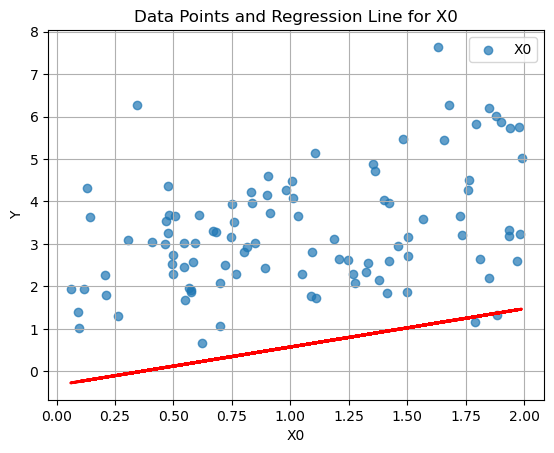

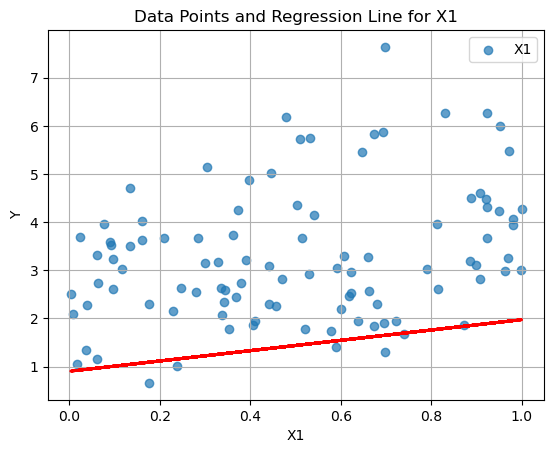

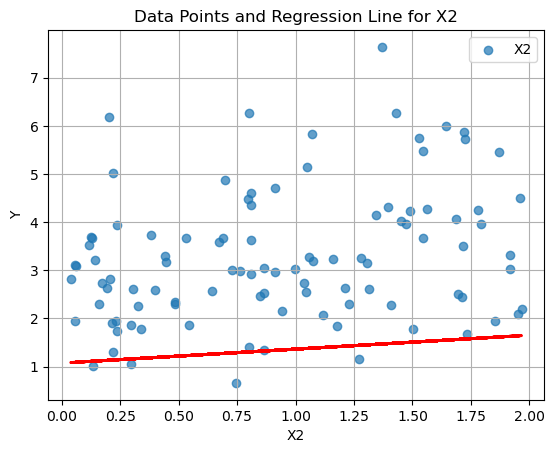

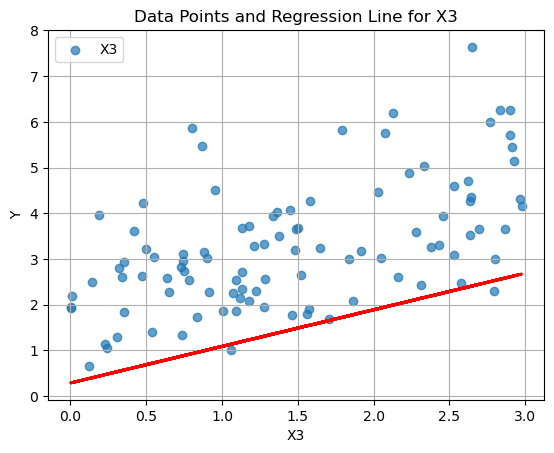

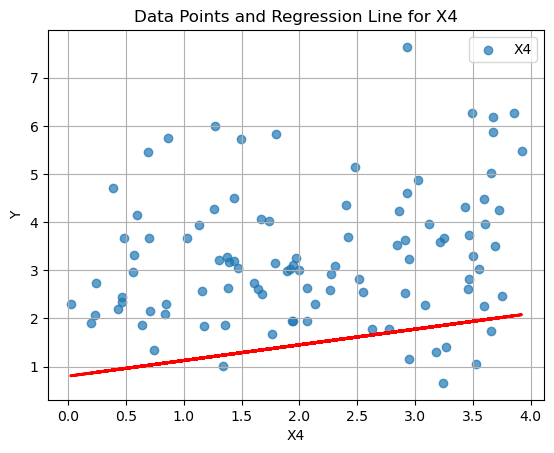

In [26]:
import matplotlib.pyplot as plt

# Plot data points and regression line for individual features
for i in range(num_features):
    # Extract feature X_i
    X_i = X_all[:, i]
    
    # Calculate regression line for feature X_i
    X_i_with_bias = np.hstack([np.ones((num_samples, 1)), X_i.reshape(-1, 1)])
    regression_line = X_i_with_bias @ coefficients[i:i+2]
    
    # Plot data points
    plt.scatter(X_i, Y, label=f'X{i}', alpha=0.7)
    
    # Plot regression line
    plt.plot(X_i, regression_line, color='red', linewidth=2)
    
    plt.xlabel(f'X{i}')
    plt.ylabel('Y')
    plt.title(f'Data Points and Regression Line for X{i}')
    plt.legend()
    plt.grid(True)
    plt.show()